In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from scipy.stats import norm

/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# Configure plot aesthetics
plt.rcParams['font.family'] = 'serif'  
plt.rcParams["xtick.labelsize"] = 13
plt.rcParams["ytick.labelsize"] = 13
plt.rcParams['axes.labelsize'] = 14
plt.rcParams["legend.fontsize"] = 13
plt.rcParams["axes.titlesize"] = 12
plt.rcParams['axes.labelweight'] = 'bold'

In [3]:

# Create the output directory if it doesn't exist
outdir = "SNR-Peak-QQ-plot"
os.makedirs(outdir, exist_ok=True)
directory = 'SNR-Peak'

# Define the threshold for SNR difference
threshold = 0.05

*********************************************

 98-110_Hz

Threshold for unchanged SNR: ±0.05
Unchanged SNRs (|difference| <= 0.05): 3.01%
Increased SNRs (difference > 0.05): 73.46%
Decreased SNRs (difference < -0.05): 23.53%


/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


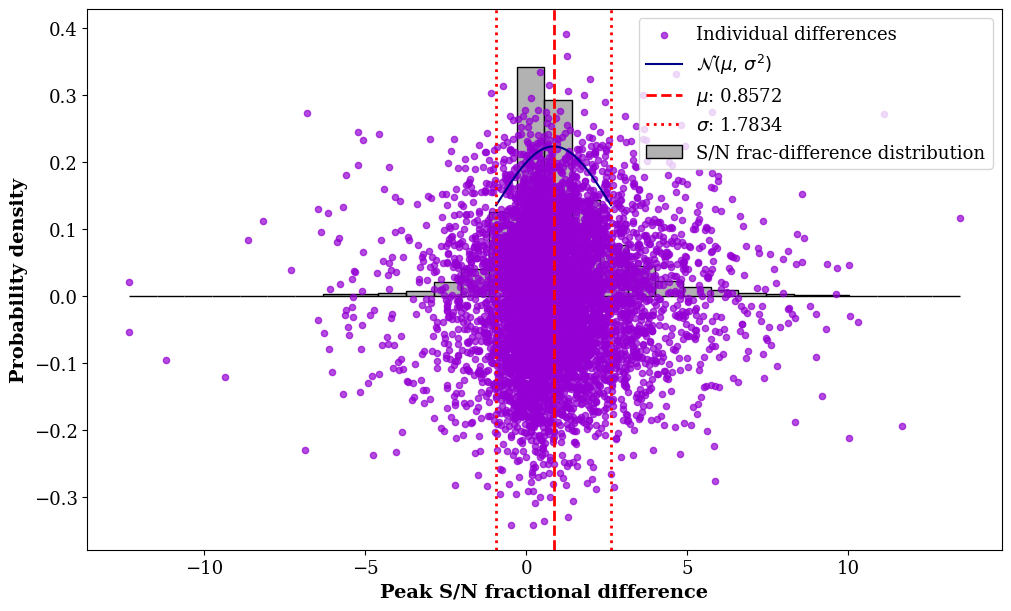


increasement:  73.4567901234568 %
decrease:  23.530276308054084 %
equality:  3.012933568489124 %
+++++++++++++++++++++++++++++++++++++++++


mean:  0.8572213641142215
standar deviation:  1.7834248664456585
Within 5 standar deviation:  78.93885949441504 %

Improvement : 0.766002114158373 %
+++++++++++++++++++++++++++++++++++++++++

min of sigma : -92.5321574417822
max of sigma : 263.36454413215336
2.64064623055988
*********************************************

 142-162_Hz

Threshold for unchanged SNR: ±0.05
Unchanged SNRs (|difference| <= 0.05): 3.75%
Increased SNRs (difference > 0.05): 43.80%
Decreased SNRs (difference < -0.05): 52.44%


/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


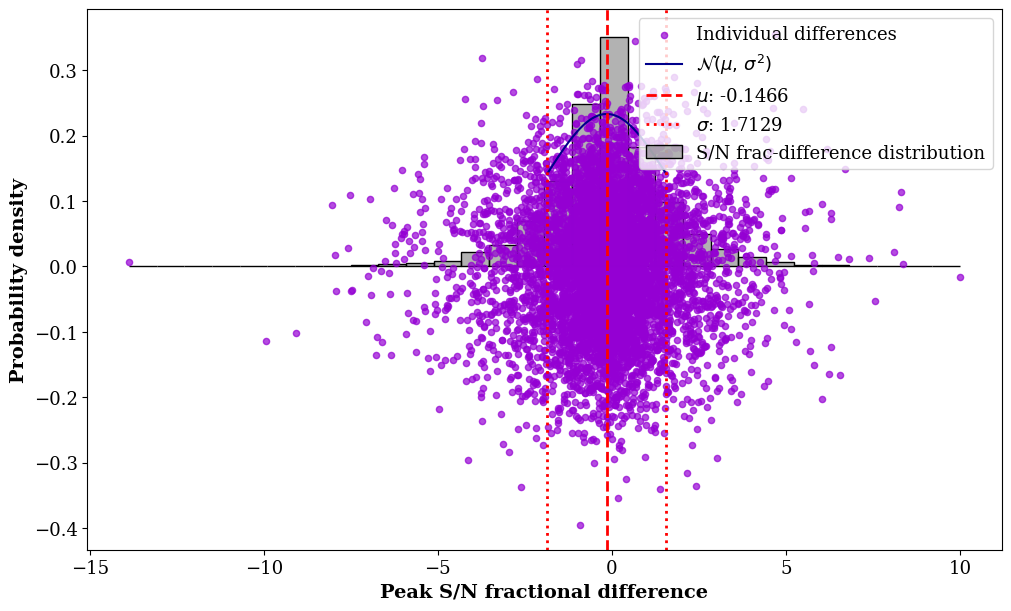


increasement:  43.8034188034188 %
decrease:  52.44200244200245 %
equality:  3.7545787545787546 %
+++++++++++++++++++++++++++++++++++++++++


mean:  -0.14657824257818858
standar deviation:  1.7128573758397345
Within 5 standar deviation:  76.03785103785103 %

Improvement : -0.3175524738910203 %
+++++++++++++++++++++++++++++++++++++++++

min of sigma : -185.8780621466252
max of sigma : 156.35507131850375
1.566279133261546
*********************************************

 197-208_Hz

Threshold for unchanged SNR: ±0.05
Unchanged SNRs (|difference| <= 0.05): 32.66%
Increased SNRs (difference > 0.05): 33.83%
Decreased SNRs (difference < -0.05): 33.51%


/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


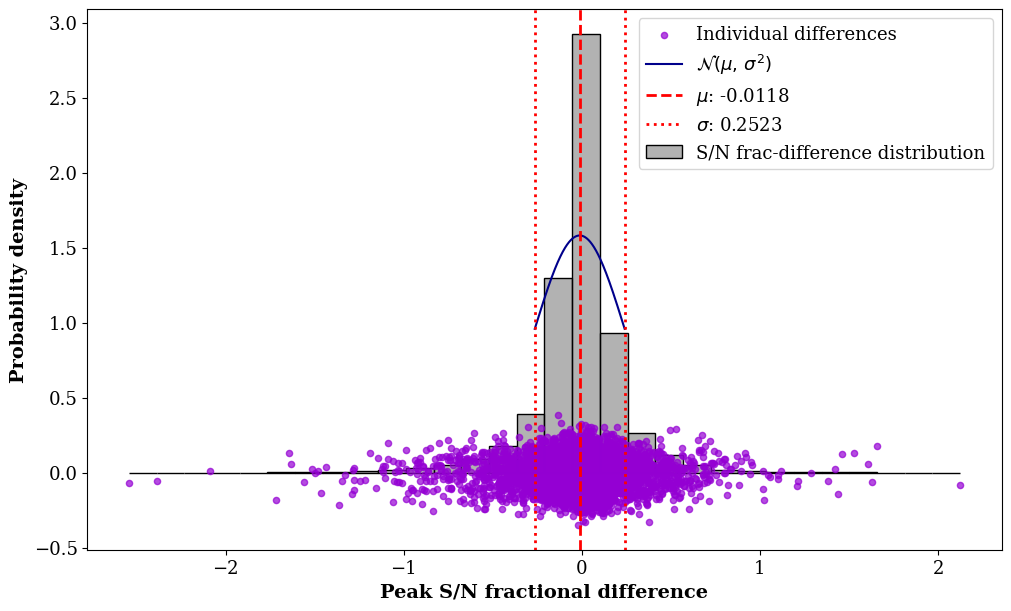


increasement:  33.83303938859494 %
decrease:  33.50970017636684 %
equality:  32.65726043503821 %
+++++++++++++++++++++++++++++++++++++++++


mean:  -0.011842441426521858
standar deviation:  0.25230418086430323
Within 5 standar deviation:  82.27513227513228 %

Improvement : 0.003457730095250291 %
+++++++++++++++++++++++++++++++++++++++++

min of sigma : -26.372047311915736
max of sigma : 24.04559239676658
0.24046173943778137
*********************************************

 15-415_Hz

Threshold for unchanged SNR: ±0.05
Unchanged SNRs (|difference| <= 0.05): 0.99%
Increased SNRs (difference > 0.05): 70.80%
Decreased SNRs (difference < -0.05): 28.21%


/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


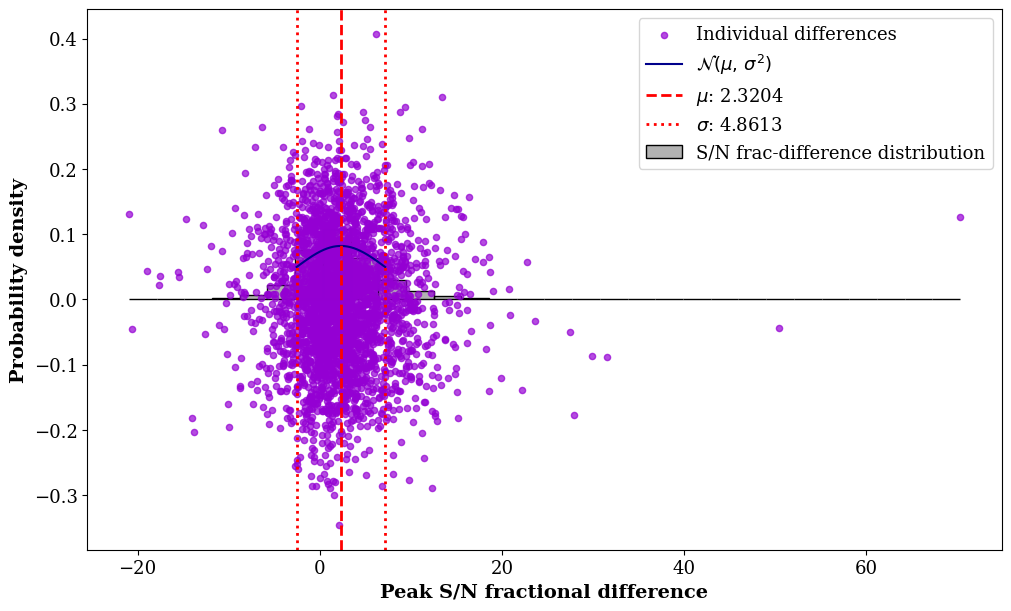


increasement:  70.80026455026454 %
decrease:  28.20767195767196 %
equality:  0.992063492063492 %
+++++++++++++++++++++++++++++++++++++++++


mean:  2.3204059303459643
standar deviation:  4.861328743568825
Within 5 standar deviation:  77.01719576719577 %

Improvement : 1.7257568046742662 %
+++++++++++++++++++++++++++++++++++++++++

min of sigma : -253.97370920828735
max of sigma : 716.7051007009036
7.181734673914789


In [7]:
for freq in ['98-110_Hz', '142-162_Hz', '197-208_Hz', '15-415_Hz']: 
    print("*********************************************")
    print(f"\n {freq}\n")
    
    # Load the data
    snr_pre_clean = pd.read_csv(os.path.join(directory, f'Pre_SNR_all_{freq}_32s.csv'))
    snr_post_clean = pd.read_csv(os.path.join(directory, f'Post_SNR_all_{freq}_32s.csv'))
    
    # Sort by peak SNR time
    snr_pre_clean  = snr_pre_clean.sort_values(by='Peak_SNR_Time', ascending=True)
    snr_post_clean = snr_post_clean.sort_values(by='Peak_SNR_Time', ascending=True)

    # Calculate the differences between pre and post DeepClean SNRs
    difference = (snr_post_clean['Peak_SNR'] - snr_pre_clean['Peak_SNR']) / snr_pre_clean['Peak_SNR'] 

    # Apply filtering based on the threshold
    unchanged_indices = difference[np.abs(difference) <= threshold].index
    increased_indices = difference[difference > threshold].index
    decreased_indices = difference[difference < -threshold].index

    # Calculate the percentages
    percentage_unchanged = len(unchanged_indices) / len(difference) * 100
    percentage_increased = len(increased_indices) / len(difference) * 100
    percentage_decreased = len(decreased_indices) / len(difference) * 100

    # Print results
    print(f"Threshold for unchanged SNR: ±{threshold}")
    print(f"Unchanged SNRs (|difference| <= {threshold}): {percentage_unchanged:.2f}%")
    print(f"Increased SNRs (difference > {threshold}): {percentage_increased:.2f}%")
    print(f"Decreased SNRs (difference < -{threshold}): {percentage_decreased:.2f}%")

    # Optional: Save filtered data
    unchanged_snr = snr_pre_clean.loc[unchanged_indices]
    increased_snr = snr_pre_clean.loc[increased_indices]
    decreased_snr = snr_pre_clean.loc[decreased_indices]

    # unchanged_snr.to_csv(os.path.join(outdir, f'Unchanged_SNR_{freq}.csv'), index=False)
    # increased_snr.to_csv(os.path.join(outdir, f'Increased_SNR_{freq}.csv'), index=False)
    # decreased_snr.to_csv(os.path.join(outdir, f'Decreased_SNR_{freq}.csv'), index=False)

    # Calculate statistics for histogram
    mean_difference = difference.mean()
    std_difference  = difference.std()
    median_difference = difference.median()

    # Generate points on the x-axis for the normal distribution curve
    x_points = np.linspace(mean_difference - 1 * std_difference, mean_difference +  1* std_difference, 10000)
    y_points = norm.pdf(x_points, mean_difference, std_difference)
    
    # Calculate the number of data points within +/- 5 standard deviations
    within_5_std = difference[(difference >= mean_difference - 1*std_difference) & (difference <= mean_difference + 1*std_difference)]
    percentage_within_5_std = len(within_5_std) / len(difference) * 100
 
        # Define colors for different categories
    color_increased = '#2ca02c'  # Green for decreased 
    color_decreased = '#ff7f0e'  # Orange for decreased
    color_unchanged = '#ff7f0e'  # Orange  for unchanged
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 6), constrained_layout=True)
    sns.histplot(difference, bins=30, kde=False, stat='density', color='gray', alpha=0.6, label='S/N frac-difference distribution', ax=ax)
    jitter = np.random.normal(scale=0.1, size=len(difference))
    ax.scatter(difference, jitter, color='#9400D3', alpha=0.7, s=20, label='Individual differences')
    # ax.scatter(difference.loc[unchanged_indices], jitter[unchanged_indices], color=color_unchanged, alpha=0.3, label='Unchanged', s=20)
    # ax.scatter(difference.loc[increased_indices], jitter[increased_indices], color='#9400D3' , alpha=0.5, label='Individual differences', s=20)
    # ax.scatter(difference.loc[decreased_indices], jitter[decreased_indices], color=color_decreased, alpha=0.5, s=20)

    ax.plot(x_points, y_points, color='darkblue', label='$\mathcal{N}(\mu,\,\sigma^{2})$')
    ax.axvline(mean_difference, color='red', linestyle='dashed', linewidth=2, label=f'$\\mu$: {mean_difference:.4f}')
    ax.axvline(mean_difference + std_difference, color='red', linestyle='dotted', linewidth=2, label=f'$\\sigma$: {std_difference:.4f}')
    ax.axvline(mean_difference - std_difference, color='red', linestyle='dotted', linewidth=2)


    # Annotate the plot
    ax.set_xlabel(r'Peak S/N fractional difference')
    ax.set_ylabel(r'Probability density')
    ax.legend(loc="upper right")

    # Save the plot
    plt.savefig(os.path.join(outdir, f'SNR_Hist_different_{freq}.pdf'), bbox_inches='tight', dpi=300)
    plt.show()

    print("==============================\n")
    print("increasement: ", percentage_increased, "%")
    print("decrease: ", percentage_decreased, "%")
    print("equality: ", percentage_unchanged, "%")
    print("+++++++++++++++++++++++++++++++++++++++++\n")


    print("==============================\n")
    print("mean: ", mean_difference )
    print("standar deviation: ", std_difference)
    print("Within 5 standar deviation: ",  percentage_within_5_std, "%")
    
    
        
    improv = ((snr_post_clean['Peak_SNR'] - snr_pre_clean['Peak_SNR']) / snr_pre_clean['Peak_SNR']).mean() * 100
    
    print("==============================\n")
    print("Improvement :", improv, "%")
    print("+++++++++++++++++++++++++++++++++++++++++\n")
   


    print("min of sigma :",  min(within_5_std) * 100)
    print("max of sigma :",  max(within_5_std) * 100)
    print(mean_difference + std_difference)

In [5]:
# cred_interval = 0.9999
# norm.ppf(cred_interval, loc=mean_difference, scale=std_difference)
# mean_difference

In [6]:
# import os
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy.stats import norm
# # Define your threshold
# threshold = 0.05  # Example threshold, adjust as needed

# # Frequencies to iterate over
# frequencies = ['98-110_Hz', '142-162_Hz', '197-208_Hz', '15-415_Hz']

# for freq in frequencies:
#     print("*********************************************")
#     print(f"\n {freq}\n")
    
#     # Load the data
#     snr_pre_clean = pd.read_csv(os.path.join(directory, f'Pre_SNR_all_{freq}_32s.csv'))
#     snr_post_clean = pd.read_csv(os.path.join(directory, f'Post_SNR_all_{freq}_32s.csv'))
    
#     # Sort by peak SNR time
#     snr_pre_clean = snr_pre_clean.sort_values(by='Peak_SNR_Time', ascending=True)
#     snr_post_clean = snr_post_clean.sort_values(by='Peak_SNR_Time', ascending=True)

#     # Calculate the differences between pre and post DeepClean SNRs
#     difference = (snr_post_clean['Peak_SNR'] - snr_pre_clean['Peak_SNR']) / snr_pre_clean['Peak_SNR']

  
#     # Generate the histogram plot
#     plt.figure(figsize=(10, 6))
    
#     # Plot histogram for snr_pre_clean
#     sns.histplot(
#         snr_pre_clean['Peak_SNR'], 
#         bins=30, 
#         kde=False, 
#         stat='density', 
#         color='blue', 
#         alpha=0.6, 
#         label='Before DeepClean'
#     )
    
#     # Plot histogram for snr_post_clean
#     sns.histplot(
#         snr_post_clean['Peak_SNR'], 
#         bins=30, 
#         kde=False, 
#         stat='density', 
#         color='orange', 
#         alpha=0.6, 
#         label='After DeepClean'
#     )
    
#     # Add labels and title
#     plt.xlabel('Peak SNR')
#     plt.ylabel('Probability Density')
#     plt.title(f'SNR Histogram for {freq}')
#     plt.legend(loc='upper right')
    
#     # Save the plot
#     plt.savefig(os.path.join(outdir, f'SNR_Histograms_{freq}.pdf'), bbox_inches='tight', dpi=300)
#     plt.show()


#     # Additional statistics (if needed)
#     mean_difference = difference.mean()
#     std_difference = difference.std()
#     median_difference = difference.median()

#     # Calculate the number of data points within +/- 5 standard deviations
#     within_5_std = difference[(difference >= mean_difference - 5*std_difference) & 
#                               (difference <= mean_difference + 5*std_difference)]
#     percentage_within_5_std = len(within_5_std) / len(difference) * 100

#     print("==============================\n")
#     print("Median Difference: {:.4f}".format(median_difference))
#     print("Standard Deviation: {:.4f}".format(std_difference))
#     print("Within 5 Standard Deviations: {:.2f}%".format(percentage_within_5_std))
    
#     improv = difference.mean() * 100
#     print("==============================\n")
#     print("Improvement: {:.2f}%".format(improv))
#     print("+++++++++++++++++++++++++++++++++++++++++\n")

#     print("Min within 5 std: {:.4f}".format(within_5_std.min()))
#     print("Max within 5 std: {:.4f}".format(within_5_std.max()))
